# Apply ROIs, PCA

In [1]:
import numpy as np
from nilearn import image
from nilearn.image import load_img
from nilearn.masking import apply_mask

In [2]:
img = image.load_img("data/sub-001/func/swasub-001_task-stroop_bold.nii")

In [3]:
mask = image.load_img("ROIs/goal.nii.gz")

## Goal

In [18]:
goal_roi = apply_mask(img, image.index_img(mask, 0))

In [19]:
import matplotlib.pyplot as plt

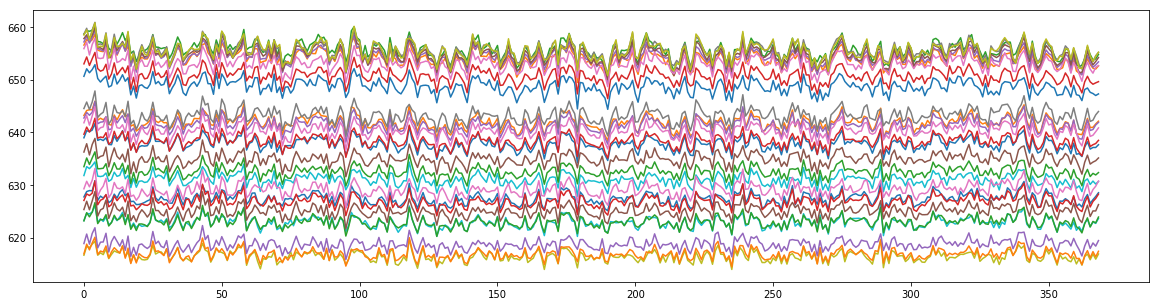

In [20]:
fig = plt.figure()
plt.plot(goal_roi)
fig.set_size_inches(20, 5)

## PCA

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
# normalize data
scaler = StandardScaler()
scaler.fit(goal_roi)
normalized = scaler.transform(goal_roi)

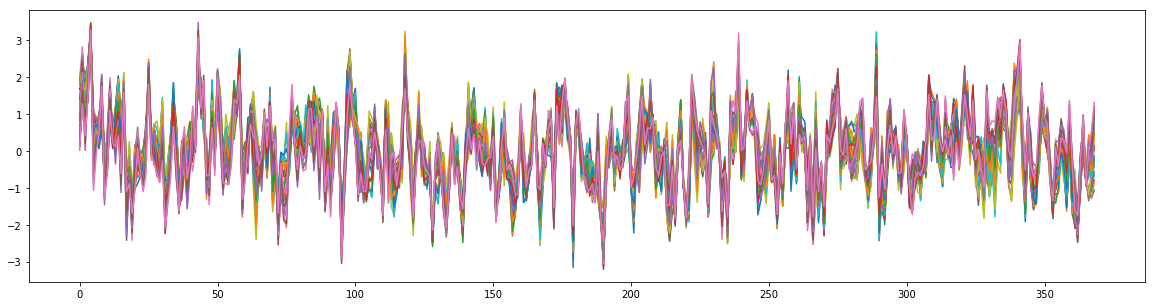

In [23]:
fig = plt.figure()
plt.plot(normalized)
fig.set_size_inches(20, 5)

In [24]:
pca = PCA(n_components=1)

In [25]:
pca.fit(normalized)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# project data

In [29]:
projected = pca.transform(goal_roi)

In [30]:
var_projected = np.sum(np.var(projected, axis=0))
var_original = np.sum(np.var(goal_roi, axis=0))

In [31]:
# percentage of variance explained
var_projected / var_original

0.8293429930936917